# Machine Learning: Session 3

In [2]:
import graphviz
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn import tree
from sklearn import datasets
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0)
CRED = '\033[91m'
CEND = '\033[0m'

## Task 1. Different distance measures in KNN (1 point)

The goal of this task is to understand better how different distance measures can affect the KNN performance. In addition, we are going to test the effect of normalizing input features and using weighted averaging for the nearest neighbours.

**(a)** Load the "wine" dataset from sklearn datasets, put input features into pandas dataframe and name the columns with feature names. <br>
Report the number of features and the number of classes in the dataset.

In [2]:
#Load dataset
wine = datasets.load_wine()
#HINTS:
#wine.data contains numpy array of dataset input features
#wine.target contains labels of instances
#wine.feature_names contains features labels

try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    #raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    wine_train = pd.DataFrame(data = wine.data, columns = wine.feature_names)
    num_features = wine_train.shape[1]  # Number of features
    num_classes = len(set(wine.target))  # Number of classes
    display(wine_train.head())
    print("Number of features:", num_features)
    print("Number of classes:", num_classes)
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


Number of features: 13
Number of classes: 3


**<font color='purple'>Answer to (a):</font>**

**(b)** Split the dataset into 80% training data and 20% test data using random seed = 22, and report the number of instances in the training set and in the test set.

In [3]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    #raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    X = wine_train
    y = wine.target
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=22)
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

**<font color='purple'>Answer to (b):</font>**

**(c)** Use the KNN Classifier from Sklearn to fit a model for different values of K (3, 5, 7). Report test accuracy for each K. Report the best K to be used on this dataset.

In [4]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    #raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    k_values = [3, 5, 7]
    best_k = None
    best_accuracy = 0

    for k in k_values:
        # Initialize and fit the KNN classifier
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)

        # Predict on the test set
        y_pred = knn.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)

        # Print accuracy for the current K
        print(f"Test accuracy for K={k}: {accuracy}")

        # Update the best K if needed
        if accuracy > best_accuracy:
            best_k = k
            best_accuracy = accuracy

    print("Best K:", best_k)
    print("Best test accuracy:", best_accuracy)
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

Test accuracy for K=3: 0.6666666666666666
Test accuracy for K=5: 0.6944444444444444
Test accuracy for K=7: 0.6666666666666666
Best K: 5
Best test accuracy: 0.6944444444444444


**<font color='purple'>Answer to (c):</font>**

**(d)** Use the best value of K from the previous subtask, and try changing the distance metric used by KNN into euclidean, manhattan, chebyshev and minkowski with P = 3. Report the accuracy obtained with each metric. Report the best metric to be used on this dataset.

In [5]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    #raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']

    best_metric = None
    best_accuracy = 0

    for metric in metrics:
        # Initialize and fit the KNN classifier with the best K
        knn = KNeighborsClassifier(n_neighbors=best_k, metric=metric, p=3)
        knn.fit(X_train, y_train)

        # Predict on the test set
        y_pred = knn.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)

        # Print accuracy for the current metric
        print(f"Test accuracy for metric={metric}: {accuracy}")

        # Update the best metric if needed
        if accuracy > best_accuracy:
            best_metric = metric
            best_accuracy = accuracy

    print("Best metric:", best_metric)
    print("Best test accuracy:", best_accuracy)
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

Test accuracy for metric=euclidean: 0.6944444444444444
Test accuracy for metric=manhattan: 0.7222222222222222
Test accuracy for metric=chebyshev: 0.6666666666666666
Test accuracy for metric=minkowski: 0.6944444444444444
Best metric: manhattan
Best test accuracy: 0.7222222222222222


**<font color='purple'>Answer to (d):</font>**

**(e)** Try to use weights for nearest neighbors according to the inverse of their distance from the test instance. Use the best K found in **(c)** and the best distance metric found in **(d)**. Report the accuracy and discuss whether it is better to use weights or not. (Hint: Read about `weights` parameter from <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html">HERE</a>)

In [6]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    #raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan', weights='distance')
    
    # Fitting the model and making predictions
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    # Calculating accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test accuracy with weights: {accuracy}") 
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

Test accuracy with weights: 0.8055555555555556


**<font color='purple'>Answer to (e):</font>**

**(f)** Standardize the features in the whole dataset by subtracting the mean and dividing by standard deviation from each feature (The mean and standard deviation should be calculated from the training instances only). Predict the accuracy using best parameters found in **(c)**, **(d)**, and **(e)**. Is it better to standardize / normalize your features before using KNN? WHY?

In [7]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    #raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    mean_values = X_train.mean(axis=0)
    std_values = X_train.std(axis=0)
    X_train_standardized = (X_train - mean_values) / std_values
    X_test_standardized = (X_test - mean_values) / std_values
    knn_standardized = KNeighborsClassifier(n_neighbors=5, metric='manhattan', weights='distance')
    knn_standardized.fit(X_train_standardized,y_train)
    y_pred_standardized= knn_standardized.predict(X_test_standardized)
    accuracy_standardized = accuracy_score(y_test, y_pred_standardized)
    print(f"Test accuracy with weights after manual standardization: {accuracy_standardized}")
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

Test accuracy with weights after manual standardization: 0.9444444444444444


**<font color='purple'>Answer to (f):</font>**

**(g)** Based on your observations during this task, write out what have you learnt so far when using the KNN learning algorithm.

**<font color='purple'>Answer to (g):</font>**

## Task 2. Linear and polynomial kernels in SVM (2 points)

The goal of this task is to understand better how the choice of kernel and parameter values affect the performance of SVM. You are given a two-dimensional dataset with a binary label and two features: $x_1$ and $x_2$. Your class labels are generated from the features using the XOR function, such that the class is positive when either $x_1 > 0$ or $x_2 > 0$ but not both. The following code creates this dataset and plots it.

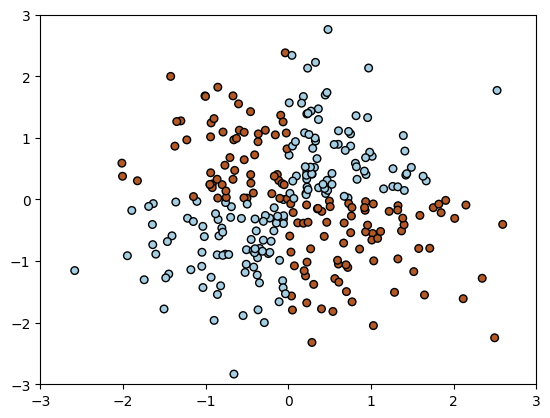

In [31]:
train_X = np.random.randn(300, 2)
train_Y = np.logical_xor(train_X[:, 0] > 0, train_X[:, 1] > 0)

plt.scatter(train_X[:, 0], train_X[:, 1], s=30, c=train_Y, cmap=plt.cm.Paired,
            edgecolors='k')
plt.axis([-3, 3, -3, 3])
plt.show()

- **(a)** Let's first learn SVM with the linear kernel. Please fill in the 2 gaps in the code.

In [34]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    #raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    # fit the model here:
    svm_model = svm.SVC(kernel='linear')
    svm_model.fit(train_X,train_Y)
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

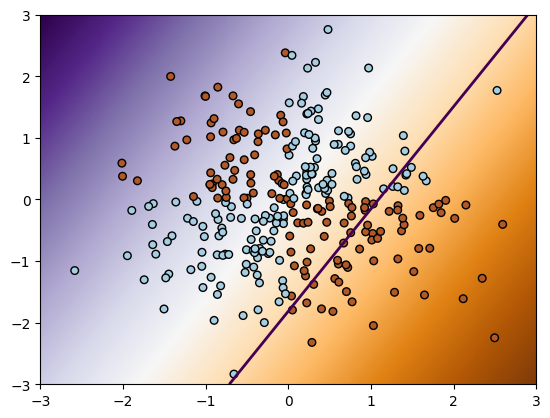

In [35]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))

def plot_svm(model, X, Y, ax = None):
    # plots the decision function for each datapoint on the grid
    
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    if ax is None:
        plt.imshow(Z, interpolation='nearest',
                   extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
                   origin='lower', cmap=plt.cm.PuOr_r)
        contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2)
        plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired,
                    edgecolors='k')
        plt.axis([-3, 3, -3, 3])
        plt.show()
    else:
        ax.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
        contours = ax.contour(xx, yy, Z, levels=[0], linewidths=2)
        ax.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired,
                    edgecolors='k')
        ax.axis([-3, 3, -3, 3])

try:
    plot_svm(svm_model, train_X, train_Y)
except Exception as e:
    print("Exception:", e)

- **(b)** Can SVM with the linear kernel separate these data? 

**<font color='purple'>Answer to (b):</font>** No


- **(c)** Now learn the SVM model with the polynomial kernel of degree 2 and degree 3. Which of them is able to learn the XOR function (not perfectly but reasonably well)?

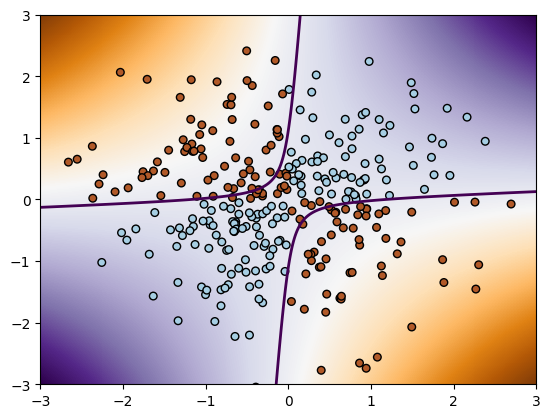

In [11]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    #raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    svm_poly_2 = svm.SVC(kernel='poly',degree=2)
    svm_poly_2.fit(train_X,train_Y)
    plot_svm(svm_poly_2,train_X,train_Y)
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

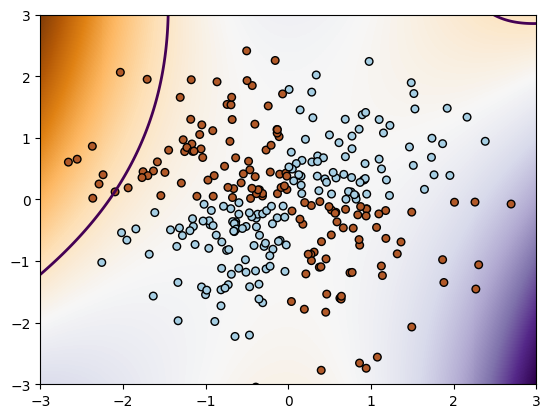

In [12]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    #raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    svm_poly_3 = svm.SVC(kernel='poly',degree=3)
    svm_poly_3.fit(train_X,train_Y)
    plot_svm(svm_poly_3,train_X,train_Y)
    # Degree 3
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

**<font color='purple'>Answer to (c):</font>**
 The one with second Degree

- **(d)** Let us try to understand the reason why one degree worked well and the other not. Which of the following features is the most useful in discriminating the two classes: $x_1$, $x_2$, $x_1^2$, $x_2^2$, $x_1^3$, $x_2^3$, $x_1 x_2$, $x_1^2 x_2$, $x_2^2 x_1$? (Hint: If you cannot guess the right answer then you could visualize these as a surface, example code for $x_2^2 x_1$ is shown below where lighter colour is a hill and darker is valley)

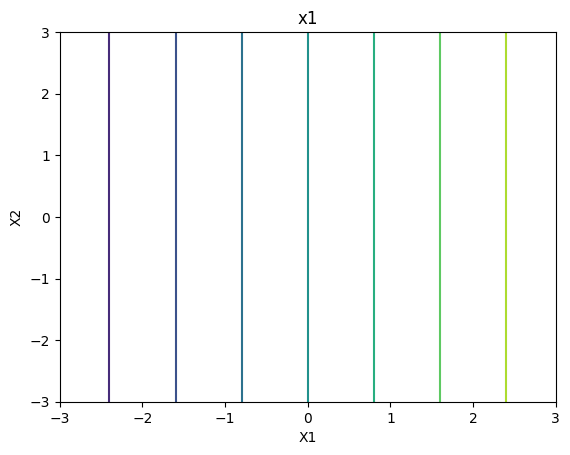

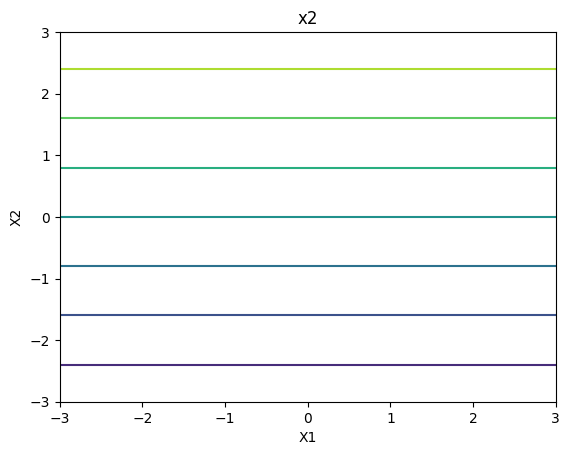

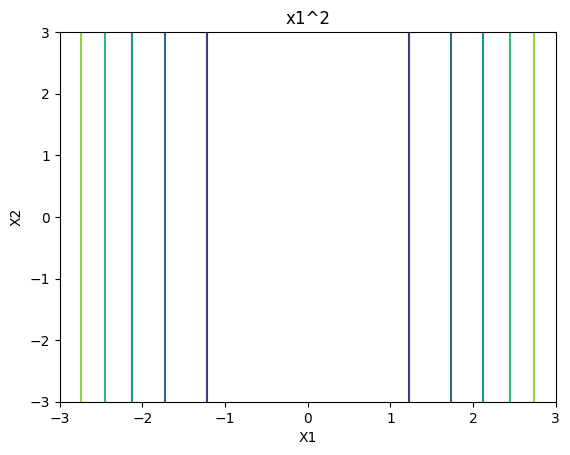

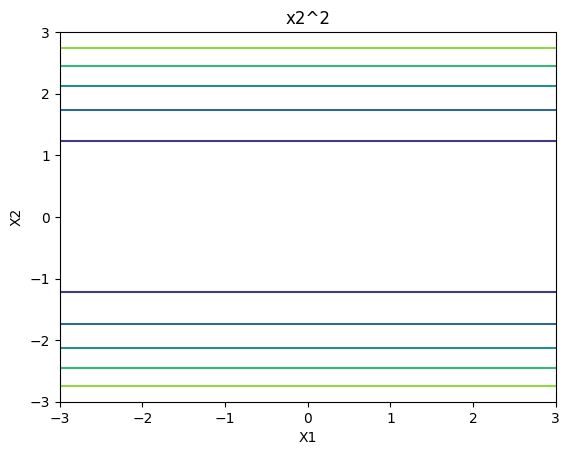

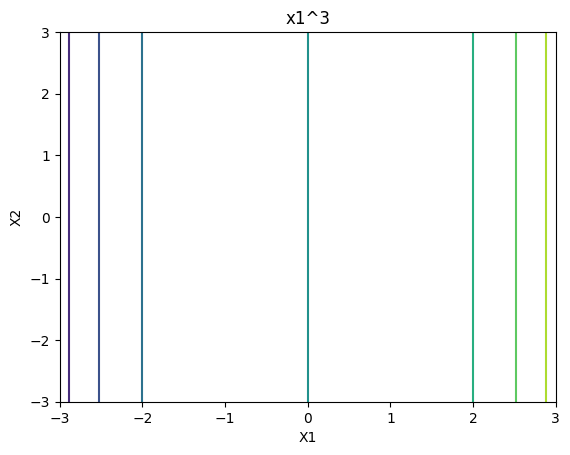

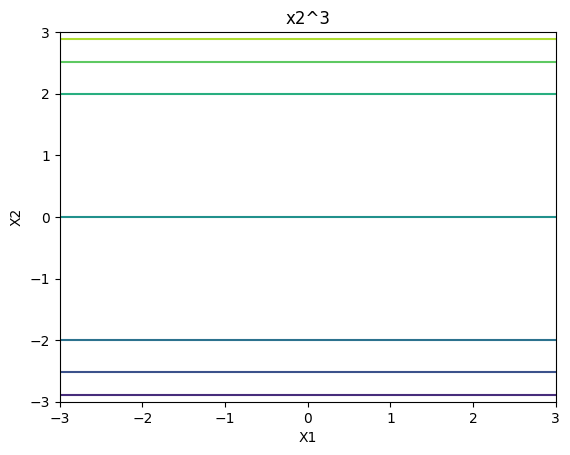

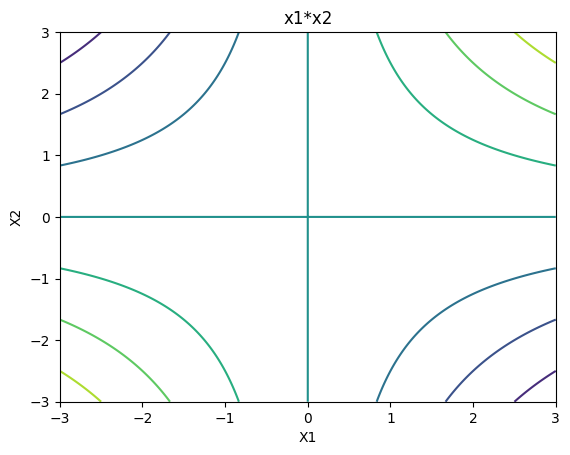

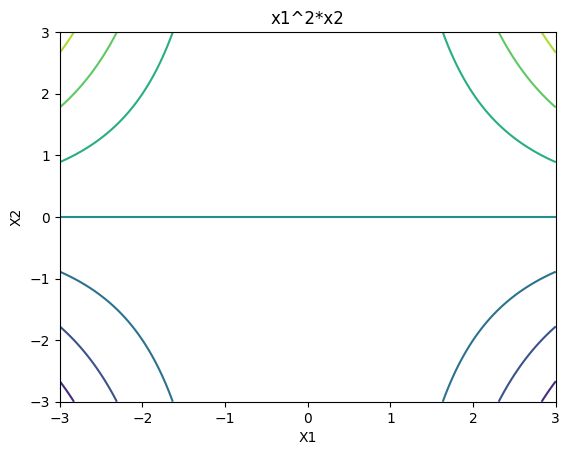

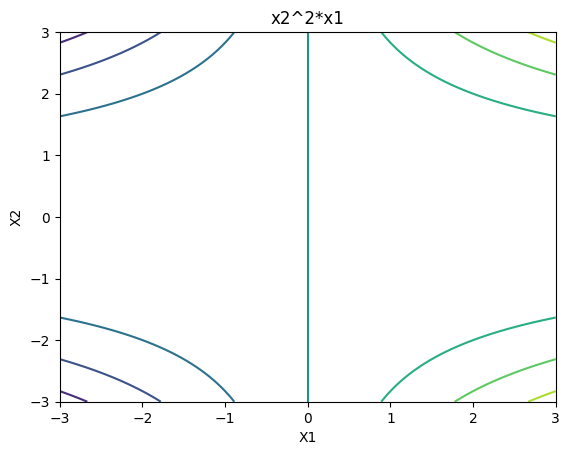

In [13]:
# plt.contour(xx, yy, yy*yy*xx,)
# plt.title('X1.X2^2')
# plt.show()
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
   # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    # Define features
    features = {
    "x1": xx,
    "x2": yy,
    "x1^2": xx**2,
    "x2^2": yy**2,
    "x1^3": xx**3,
    "x2^3": yy**3,
    "x1*x2": xx * yy,
    "x1^2*x2": xx**2 * yy,
    "x2^2*x1": yy**2 * xx
    }
    # Visualize each feature
    for feature_name, feature_values in features.items():
        plt.figure()
        plt.contour(xx, yy, feature_values)
        plt.title(feature_name)
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.show()
    # Visualize rest of the features similarly as above
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

**<font color='purple'>Answer to (d):</font>**
The second degree polynomaial has more effect due to the features that are of the second degree, also from the plot we can see that it has distinct peaks and valleys which indicates that it has signifcant influence in discriminating among the classes unlike others that has a smooth surface without any hills or valleys which means it doesn't have a strong influence on the classes

- **(e)** Expand the expression $\kappa(\mathbf{x},\mathbf{z})=\left(\mathbf{x}\cdot\mathbf{z}\right)^2$ (open the brackets) where $\mathbf{x}=(x_1,x_2)$ and $\mathbf{z}=(z_1,z_2)$. **<font color='purple'>For this please modify the following code for your purpose:</font>** Hint: we did this in the practice session, but you can follow a similar example at page 51 of Lecture 05.

In [14]:

import sympy as sp
sp.init_printing(use_latex='mathjax')

try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    #raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    #Example
    # a, b = sp.symbols('a_1 b_2')
    # sp.expand( (a + b)**2 )
    x1, x2, z1, z2 = sp.symbols('x1 x2 z1 z2')
    second_expression = (x1 * z1 + x2 * z2)**2
    second_expanded = sp.expand(second_expression)
    print(second_expanded)
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

x1**2*z1**2 + 2*x1*x2*z1*z2 + x2**2*z2**2


- **(f)** Please now list all features that are included in the constructed feature space $\phi(\mathbf{x})$ corresponding to the kernel $\kappa(\mathbf{x},\mathbf{z})=(\mathbf{x}\cdot\mathbf{z})^2$. Hint: You can read this out from your answer to **(e)** because $\kappa(\mathbf{x},\mathbf{z})=\phi(\mathbf{x})\cdot\phi(\mathbf{z})$.

**<font color='purple'>Answer to (f):</font>**
$\phi(x)=(x_1^2,\sqrt{2}x_1x_2, x_2^2)$
$$
$$
$$

- **(g)** Is the best discriminator from subtask **(d)** present among the constructed features as listed in subtask **(f)**? Does this explain why polynomial kernel with degree 2 performed well / not well in subtask **(c)**? 

**<font color='purple'>Answer to (g):</font>**
Yes it's there and this explains why it performed well due to it being in the second degree and since the second degree performs well on quadratic relations it was good with it

- **(h)** Please now expand the expression $\kappa(\mathbf{x},\mathbf{z})=\left(\mathbf{x}\cdot\mathbf{z}\right)^3$ similarly to subtask **(e)** and list the features in the constructed feature space $\phi(\mathbf{x})$ corresponding to this kernel, as in subtask **(f)**. 

In [15]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    #raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    x1, x2, z1, z2 = sp.symbols('x1 x2 z1 z2')
    third_expression = (x1 * z1 + x2 * z2)**3
    third_expanded = sp.expand(third_expression)
    print(third_expanded)
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

x1**3*z1**3 + 3*x1**2*x2*z1**2*z2 + 3*x1*x2**2*z1*z2**2 + x2**3*z2**3


**<font color='purple'>Answer to (h):</font>**
$\phi(x)=(x_1^3, \sqrt 3x_1^2x_2, \sqrt 3x_1x_2^2, x_2^3)$

- **(i)** Is the best discriminator from subtask **(d)** present among the constructed features as listed in subtask **(h)**? Does this explain why polynomial kernel with degree 3 performed well / not well in subtask **(c)**? 

**<font color='purple'>Answer to (i):</font>**
No ,its not there &  yes it explains why since it operates best on cubic relations which is not one of the features that has a strong influence in our dataset


- **(j)** The polynomial kernel is actually defined by $\kappa(\mathbf{x},\mathbf{z}) = (\mathbf{x}\cdot\mathbf{z}+r)^d$, but by default this r is 0. Take $r = 1$ and $d = 3$ and list the features in the constructed feature space $\phi(\mathbf{x})$ corresponding to this kernel. Is the necessary feature present now?

In [16]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    #raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    x1, x2, z1, z2 = sp.symbols('x1 x2 z1 z2')
    dot_product = x1 * z1 + x2 * z2
    r = 1
    d = 3
    polynomial_kernel = (dot_product + r)**d
    # Expand the polynomial kernel to get the features in the feature space
    features_expanded = sp.expand(polynomial_kernel)
    print(features_expanded)
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

x1**3*z1**3 + 3*x1**2*x2*z1**2*z2 + 3*x1**2*z1**2 + 3*x1*x2**2*z1*z2**2 + 6*x1*x2*z1*z2 + 3*x1*z1 + x2**3*z2**3 + 3*x2**2*z2**2 + 3*x2*z2 + 1


**<font color='purple'>Answer to (j):</font>**
$ \phi (x) = (x_1^3, \sqrt 3x_1^2,\sqrt 3x_1,1, \sqrt 3x_1^2x2_2, \sqrt 3x_1x_2^2, \sqrt 3 x_2^2, \sqrt 3 x_2, \sqrt 3x_2^2x_1, \sqrt 3x_2x_1^2)$

yes it contains 2nd degree terms

- **(k)** The value $r$ is represented by parameter 'coef0' in the SVC function. Change it to 1 and see if you can now learn XOR with polynomial kernel of degree 3. Make the resulting plot and report if learning of XOR succeeded.

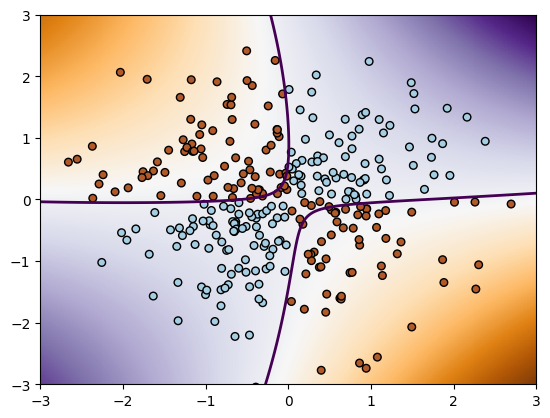

In [17]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    #raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    svm_poly = svm.SVC(kernel='poly',degree=3, coef0=1)
    svm_poly.fit(train_X,train_Y)
    plot_svm(svm_poly,train_X,train_Y)
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

**<font color='purple'>Answer to (k):</font>** yes it succeeded when we did this


## Task 3: Gaussian kernel in SVM (1 point)

- **(a)** Make __6__ plots and show how RBF kernel works with different C values: 0.1, 0.5, 1, 2, 10, 100. What do you observe? What does parameter C do? 

    - Hint 1: Remember the soft-margin SVM formula and check out what the C parameter stood for. 
    - Hint 2: Use `plt.subplots(2, 3, figsize=...)` to arrange them nicely and `plot_svm(svm_model, train_X, train_Y, ax=ax[i][j])` to plot to the subplot in row i and column j. 
    - Hint 3: Make sure you run `plt.show()` after the plotting.

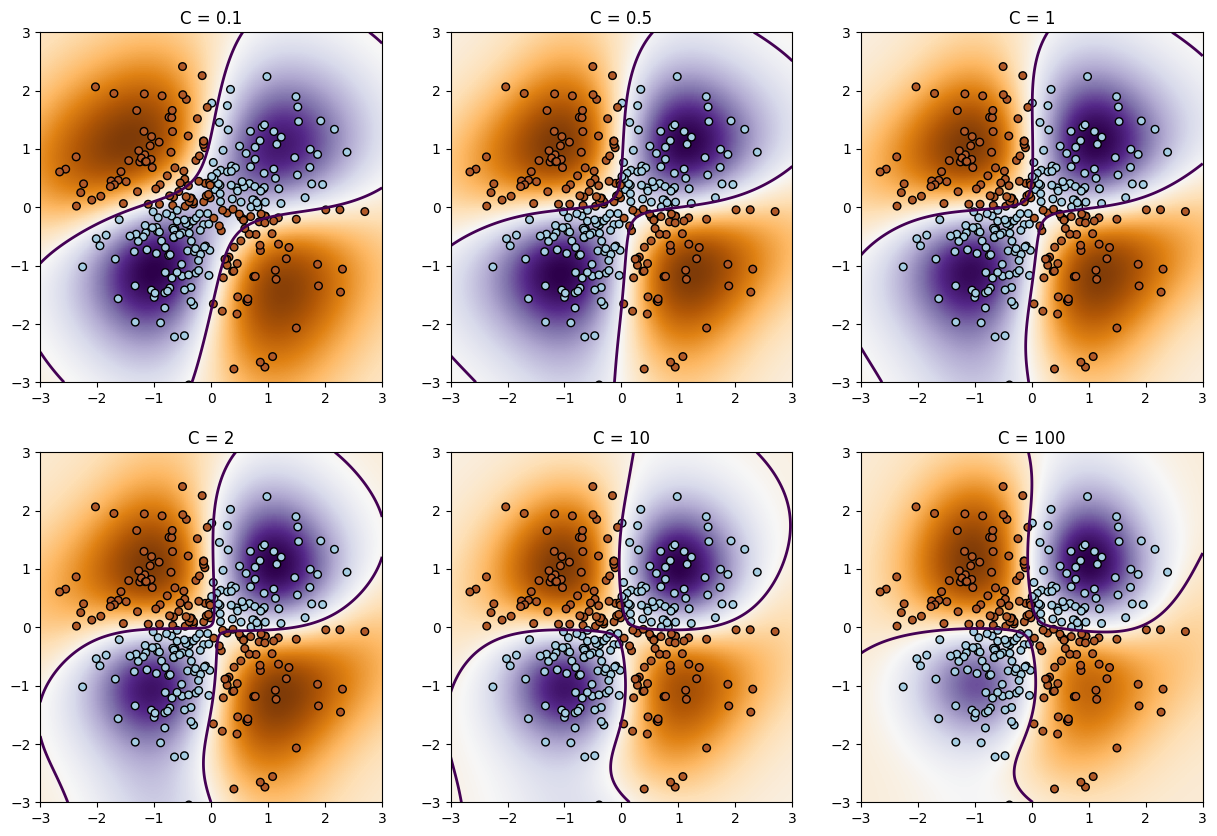

In [44]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    #raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    np.random.seed(0)
    X = np.random.randn(300, 2)
    y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
    C_values = [0.1,0.5,1,2,10,100]
    fig, ax = plt.subplots(2, 3, figsize=(15, 10))

    for i, C in enumerate(C_values):
        row = i // 3
        col = i % 3
        ax[row, col].set_title(f'C = {C}')
        svm_model_rbf = svm.SVC(kernel='rbf', C=C)
        svm_model_rbf.fit(X, y)
        plot_svm(svm_model_rbf, X, y,ax[row, col])
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

**<font color='purple'>Answer to (a):</font>**
the more we increase the C the more it overfits and becomes less generalized and makes a smaller margin 

- **(b)** Now change the gamma parameter: 0.01, 0.5, 1, 2, 10, 100 and do the same as in the subtask **(a)**. What does the gamma parameter do? (Hint: check out the Gaussian kernel formula and rememeber that $\gamma = \frac{1}{2\sigma}$).

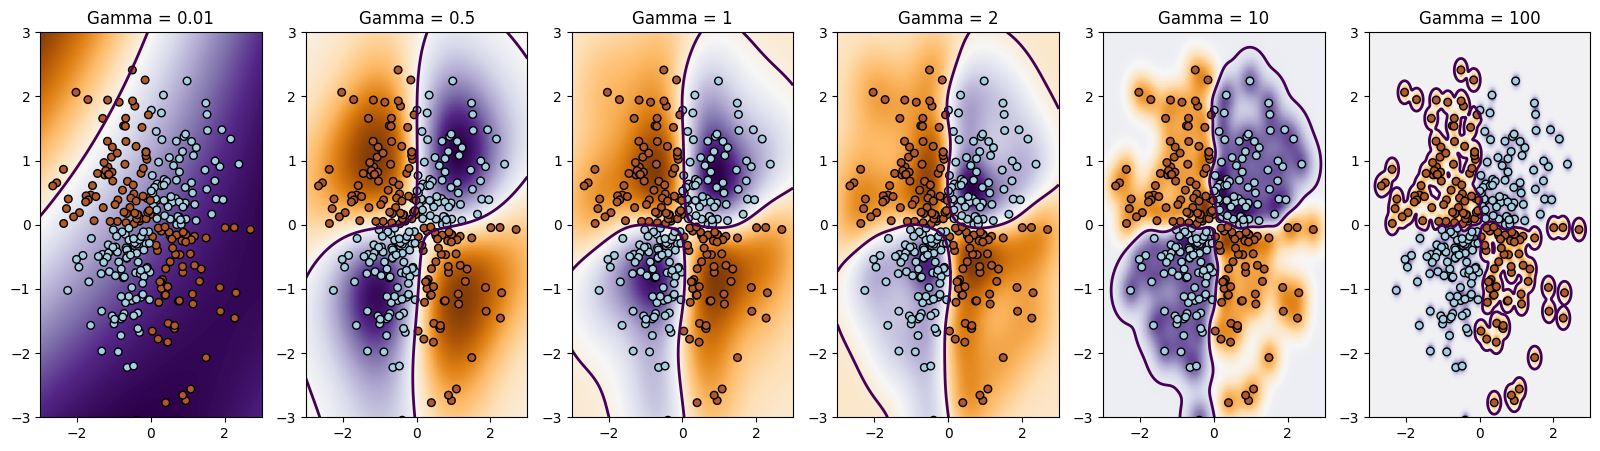

In [46]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    #raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    gamma_values = [0.01, 0.5, 1, 2, 10, 100]
    fig, ax = plt.subplots(1, len(gamma_values), figsize=(20, 5))

    for i, gamma in enumerate(gamma_values):
        ax[i].set_title(f'Gamma = {gamma}')
        svm_model_rbf = svm.SVC(kernel='rbf', gamma=gamma)
        svm_model_rbf.fit(X, y)
        plot_svm(svm_model_rbf, X, y, ax=ax[i])

    
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

**<font color='purple'>Answer to (b):</font>**
The more the gamma increases the more it makes the decision boundary sensitive to each point and makes the model also overfits

## Task 4: Decision tree learning (2 points)

The goal of this task is to understand better how the parameter values affect the performance of decision trees. We will do this on the dataset 'adult.data.csv' originating from https://archive.ics.uci.edu/ml/datasets/adult . This data file has been packaged together with the notebook. The following code loads the dataset and prepares it for the task.

**Install graphiz package for decision tree visualization in case it is not installed**
!pip install graphviz

#### In case you still have some issues with graphviz package:
**For Windows Users**: You can download graphviz from [<a href = "https://graphviz.gitlab.io/_pages/Download/Download_windows.html">HERE</a>] Then add it to the system path using the following commands. <br>
```
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'```

**For Ubuntu Linux Users:** try to use the following command to install graphviz
```sudo apt-get install graphviz```

**For MAC Users:** Use the following package
```brew install graphviz```

In [3]:
np.random.seed(0)
data = pd.read_csv("adult.data.csv", dtype="category", header = None, index_col = None, na_values=["NA", " ?", ""])
data.columns = ["age", "workclass", "not_needed1", "education1", "education", "marital_status",
               "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss",
               "hours_per_week", "country", "income"]
data.dropna(inplace = True)
data["age"] = pd.to_numeric(data["age"])
data["education"] = pd.to_numeric(data["education"])
data["capital_gain"] = pd.to_numeric(data["capital_gain"])
data["capital_loss"] = pd.to_numeric(data["capital_loss"])
data["hours_per_week"] = pd.to_numeric(data["hours_per_week"])
data["capital_gain"] = data["capital_gain"] - data["capital_loss"]
data["income"] = data.income.str.strip()
data.drop(["not_needed1", "education1", "relationship", "capital_gain", "capital_loss",
          "country"], axis = 1, inplace = True)
a = data[data.income == ">50K"].index
b = data[data.income == "<=50K"].index
b = np.random.choice(b, size = len(a), replace = False)
data = data.loc[np.concatenate([a, b])]

In [4]:
data.head()

,age,workclass,education,marital_status,occupation,race,sex,hours_per_week,income
7,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,White,Male,45,>50K
8,31,Private,14,Never-married,Prof-specialty,White,Female,50,>50K
9,42,Private,13,Married-civ-spouse,Exec-managerial,White,Male,40,>50K
10,37,Private,10,Married-civ-spouse,Exec-managerial,Black,Male,80,>50K
11,30,State-gov,13,Married-civ-spouse,Prof-specialty,Asian-Pac-Islander,Male,40,>50K


The decision tree implementation in sklearn requires all features to be numeric. We will therefore create a new binary feature for each value of each textual variable.

In [5]:
data = pd.get_dummies(data, columns = ["workclass", "marital_status", "occupation", "race", "sex"])
data.head()

,age,education,hours_per_week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
7,52,9,45,>50K,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,True
8,31,14,50,>50K,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,True,False
9,42,13,40,>50K,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,True
10,37,10,80,>50K,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,True
11,30,13,40,>50K,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True


We will consider the binary classification task of predicting income:

In [6]:
data.income.value_counts()

income
>50K     7508
<=50K    7508
Name: count, dtype: int64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(["income"], axis = 1),
                                                    data["income"], test_size = 0.5, random_state = 0)

- **(a)** First build a decision tree of maximum depth 2, calculate train and test accuracies.

In [8]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # Build a decision tree with maximum depth 2
    dt = DecisionTreeClassifier(max_depth=2)
    dt.fit(X_train, y_train)
     # Calculate train and test accuracies
    train_accuracy = dt.score(X_train, y_train)
    test_accuracy = dt.score(X_test, y_test)

    # Print the accuracies
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)
    ##### YOUR CODE ENDS #####
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

Train Accuracy: 0.7559936068193926
Test Accuracy: 0.7566595631326585


**<font color='purple'>Answer to (a):</font>**


- **(b)** Plot the tree using the following code. Interpret the tree by verbally explaining what decisions it makes on different feature values.

In [11]:
try:
    ##### YOUR CODE STARTS #####
    dot_data = tree.export_graphviz(dt, out_file=None,
                                    feature_names=X_train.columns,
                                    class_names=["<=50K", ">50K"],
                                    filled=True, rounded=True,
                                    special_characters=False)
    graph = graphviz.Source(dot_data)
    graph.render('decision_tree')  # Save the visualization to a file
    graph.view()  # Display the visualization

    ##### YOUR CODE ENDS #####
except Exception as e:
    print("Exception:", e)


Error: Could not open "decision_tree.pdf" for writing : Permission denied


Exception: Command '[WindowsPath('dot'), '-Kdot', '-Tpdf', '-O', 'decision_tree']' returned non-zero exit status 1. [stderr: b'Error: Could not open "decision_tree.pdf" for writing : Permission denied\r\n']


**<font color='purple'>Answer to (b):</font>**
The decision tree makes the following decisions:
- If education_num <= 12.5, predict <=50K
- If education_num > 12.5 and marital_status_married-civ-spouse <= 0.5, predict >50K
- If education_num > 12.5 and marital_status_married-civ-spouse > 0.5, predict <=50K

**(c)** Explain how decision tree deals with:

1. binary features
2. categorical features
3. continuous features

by describing what all possible splits are that the learning algorithm considers in case of these three types.

**<font color='purple'>Answer to (c):</font>**

Binary Features:

    Binary features have only two possible values (e.g., True/False, 0/1). The decision tree considers the following possible splits:

    Split by Value: It can split the data into two branches based on the feature's value being True or False.

Categorical Features:

    Categorical features have discrete values representing different categories or labels (e.g., colors, types). The decision tree considers the following possible splits:

    Split by Category: It can split the data based on each unique category, creating branches for each category present in the feature.
Continuous Features:

    Continuous features have a range of possible values (e.g., age, income). The decision tree considers the following possible splits:

    Binary Split by Threshold: The algorithm tests various threshold values for the continuous feature and selects the one that maximizes information gain or Gini impurity reduction. For example, for the feature 'age', it might consider splitting the data into two branches: 'age <= 30' and 'age > 30'.

- **(d)** Next, build a tree with the default parameters and calculate the train and test accuracy. Is the model good? Why/why not? Explain what are the default parameters used in sklearn for decision tree and how they influence this kind of result?

In [44]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    dt_default = DecisionTreeClassifier(random_state=0,max_depth=5,min_samples_leaf=2,min_samples_split=5)
    dt_default.fit(X_train, y_train)

    # Calculate train and test accuracies for the default model
    train_accuracy_default = dt_default.score(X_train, y_train)
    test_accuracy_default = dt_default.score(X_test, y_test)

    # Print the accuracies for the default model
    print("Default Model Train Accuracy:", train_accuracy_default)
    print("Default Model Test Accuracy:", test_accuracy_default)   
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

Default Model Train Accuracy: 0.8116675546084177
Default Model Test Accuracy: 0.8004794885455514


**<font color='purple'>Answer to (d):</font>**

Default Model Train Accuracy: 0.9790889717634523

Default Model Test Accuracy: 0.7361481086840703

Influence of Default Parameters:

The lack of a maximum depth (max_depth=None) allows the tree to grow without any restrictions, leading to a highly complex and overfit model.

So it's not better because the default decision tree model tends to overfit due to the lack of constraints on tree growth (unlimited depth) 

- **(e)** Modify the learning algorithm to get rid of the problem you had in the previous step. Try to change at least 3 parameters (first one at a time, then all together, try different combinations). Report the three parameters you experimented with and explain how they can be used to improve the tree (what do they do?). Which values did you try and what gave the best results? Build the final tree (don't show the experimenting code) and report train and test accuracies. You should achieve test accuracy > 79% without too much overfitting (meaning that training accuracy should be quite similar).

**<font color='purple'>Answer to (e):</font>**

Max Depth 5 Train Accuracy: 0.8122003196590304

Max Depth 5 Test Accuracy: 0.7999467234949388

Min Sample Leaf 2 Train Accuracy: 0.9100958977091103

Min Sample Leaf 2 Test Accuracy: 0.7406766116142781

Min Sample Split 5 Train Accuracy: 0.9338039424613745

Min Sample Split 5 Test Accuracy: 0.7424080980287693

All Together Model Train Accuracy: 0.8116675546084177

All Together Model Test Accuracy: 0.8004794885455514

Max Depth:

Max Depth controls the maximum depth of the decision tree. It limits the number of levels in the tree, preventing it from becoming too complex and overfitting to the training data.
Min Samples Leaf:

Min Samples Leaf sets the minimum number of samples required to be at a leaf node. It controls the minimum size of a leaf, preventing the tree from making overly specific decisions based on a small number of samples.
Min Samples Split:

Min Samples Split determines the minimum number of samples required to split an internal node. It controls the number of samples needed to create a new branch, helping to prevent over-segmentation of the data.

By carefully tuning these parameters, we were able to strike a balance between model complexity and generalization, resulting in an improved decision tree model with higher test accuracy while maintaining a reasonable train accuracy. This helps ensure that the model is performing well not only on the training data but also on unseen test data.

- **(f)** Now build a tree with max_depth = 7 and visualize it. Explain how to classify the first testing instance X_test.iloc[0] by visually exploring the tree (list all the nodes visited along the path through the tree until the decision). Is the decision the same as the true label? Does the decision path make sense?

In [45]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    dt_depth_7 = DecisionTreeClassifier(max_depth=7, random_state=0)
    dt_depth_7.fit(X_train, y_train)

    # Visualize the tree
    dot_data_depth_7 = tree.export_graphviz(dt_depth_7, out_file=None,
                                            feature_names=X_train.columns,
                                            class_names=["<=50K", ">50K"],
                                            filled=True, rounded=True,
                                            special_characters=False)
    graph_depth_7 = graphviz.Source(dot_data_depth_7)
    graph_depth_7.render('decision_tree_depth_7')  # Save the visualization to a file
    graph_depth_7.view()  # Display the visualization

    # Classify the first testing instance and retrieve the decision path
    first_test_instance = X_test.iloc[0]
    decision_path = dt_depth_7.decision_path([first_test_instance])

    # Print the decision path
    print("Decision path for classifying the first testing instance:")
    for node_index in decision_path.indices:
        print("Node: ", node_index)
        print("Split feature: ", X_train.columns[dt_depth_7.tree_.feature[node_index]])
        print("Split threshold: ", dt_depth_7.tree_.threshold[node_index])
        print("Decision: ", "Class >50K" if dt_depth_7.tree_.value[node_index][0][1] > dt_depth_7.tree_.value[node_index][0][0] else "Class <=50K")

    # Predict the class for the first testing instance
    predicted_label = dt_depth_7.predict([first_test_instance])
    print("Predicted Label: ", predicted_label[0])
    print("True Label: ", y_test.iloc[0])
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

Decision path for classifying the first testing instance:
Node:  0
Split feature:  marital_status_ Married-civ-spouse
Split threshold:  0.5
Decision:  Class >50K
Node:  1
Split feature:  education
Split threshold:  12.5
Decision:  Class <=50K
Node:  2
Split feature:  hours_per_week
Split threshold:  42.5
Decision:  Class <=50K
Node:  3
Split feature:  age
Split threshold:  32.5
Decision:  Class <=50K
Node:  19
Split feature:  occupation_ Prof-specialty
Split threshold:  0.5
Decision:  Class <=50K
Node:  20
Split feature:  marital_status_ Married-AF-spouse
Split threshold:  0.5
Decision:  Class <=50K
Node:  21
Split feature:  occupation_ Exec-managerial
Split threshold:  0.5
Decision:  Class <=50K
Node:  22
Split feature:  sex_ Female
Split threshold:  -2.0
Decision:  Class <=50K
Predicted Label:  <=50K
True Label:  <=50K


c:\Users\youssef.medhat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\youssef.medhat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


**<font color='purple'>Answer to (f):</font>**
The predicted label based on this decision path is "<=50K", which matches the true label of the first testing instance ("<50K"). The decision path aligns with the features and their respective values for the given instance. The model correctly predicts the income class as less than or equal to $50K based on these features, demonstrating a reasonable and accurate classification in this case.







- **(g)** What seem to be the most important features? Check out the feature importances given by the sklearn model from **(f)**. Do they agree with your guess? How are these feature importances calculated? Hint: feature importances are given by `dt.feature_importances_`

In [46]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    feature_importances = dt_depth_7.feature_importances_

    # Create a dictionary mapping features to their importances
    feature_importance_dict = dict(zip(X_train.columns, feature_importances))

    # Sort the features by importance in descending order
    sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

    # Print the sorted feature importances
    print("Feature Importances:")
    for feature, importance in sorted_feature_importances:
        print(f"{feature}: {importance}")
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

Feature Importances:
marital_status_ Married-civ-spouse: 0.5408094149866808
education: 0.23176344151247621
age: 0.10745593683781245
hours_per_week: 0.053071712396655125
occupation_ Exec-managerial: 0.013170394740098608
occupation_ Other-service: 0.00668901110058019
sex_ Female: 0.005663211276340195
occupation_ Prof-specialty: 0.005387249425977844
workclass_ Self-emp-not-inc: 0.005202949152644223
occupation_ Farming-fishing: 0.003975680698944072
workclass_ Private: 0.0031471230726965362
marital_status_ Married-AF-spouse: 0.002745992528632978
occupation_ Handlers-cleaners: 0.002571344367475666
race_ Other: 0.0021294211904557834
workclass_ Self-emp-inc: 0.0021047257152611585
occupation_ Protective-serv: 0.001987694937793246
occupation_ Transport-moving: 0.0019297622312589794
race_ Black: 0.001674682615153002
race_ Asian-Pac-Islander: 0.0016581066755655067
marital_status_ Separated: 0.0014623777796120643
race_ Amer-Indian-Eskimo: 0.0013729912989554666
marital_status_ Never-married: 0.00127

**<font color='purple'>Answer to (g):</font>**
Marital Status (Married-civ-spouse): 54.08%

Education: 23.18%

Age: 10.75%

Hours per Week: 5.31%

Occupation (Exec-managerial): 1.31%

They mostly agree wih our guess 

feature importances are calculated by measuring the relative contribution of each feature to the model's decision-making process, particularly in terms of reducing the impurity in the decision tree nodes

 ## <font color='red'>This was the last task! Please restart and run all before submission!</font>